## Data Science And Business Analytics Internship at The Sparks Foundation




> **Author: Shohanur Islam Sobuj**

---







### **TASK 1** : **Prediction using Supervised ML**

#### The task is to Predicting the percentage of an student based on the no. of study hours using Linear Regression algorithm

**Steps:**


1.  Importing the dataset
2.  Exploratory Data Analysis
3.  Data Preparing
4.  Training the algorithm
5.  Visualizing the model
6.  Making Predictions
7.  Evaluating the model







> ### STEP 01 : Importing the dataset
In this step, we will import the dataset

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
%matplotlib inline

In [ ]:
#data reading from given link
data =pd.read_csv("http://bit.ly/w-data")
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#shape of data (row,column)
data.shape

(25, 2)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#statistical information for given data
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
#checking null value
data.isnull==True

False

> ### STEP 02: Exploratory Data Analysis
  In this step we will visualize the dataset 

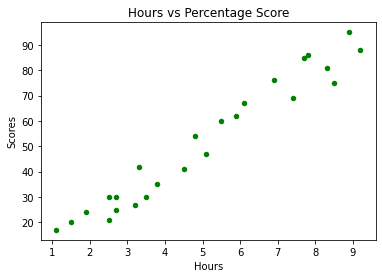

In [ ]:
# 2-d scatter plot
data.plot(kind='scatter',x='Hours',y='Scores', color='green')
plt.title('Hours vs Percentage Score')
plt.show()

> As we saw from the scatter plot that there is a linear relation between the number of Hours and Percentage Score, So we can use the linear regression algorithm to predicted further

> ### STEP 3: Data Preparing

In [ ]:
X = data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [ ]:
# splitting data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

> ### STEP 4: Training the algorithm

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
print('Training Complete')

Training Complete


> ### STEP 5: Visualizing the model

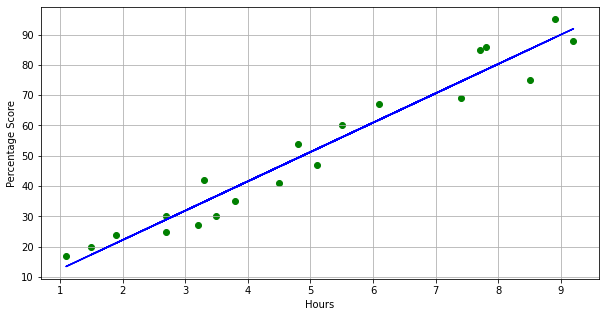

In [ ]:
#plotting regression line
line = regressor.coef_*X+regressor.intercept_
plt.figure(figsize=(10,5))
#plotting for training data
plt.scatter(X_train,y_train,color='green')
plt.plot(X,line,color='blue')
plt.xlabel('Hours')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

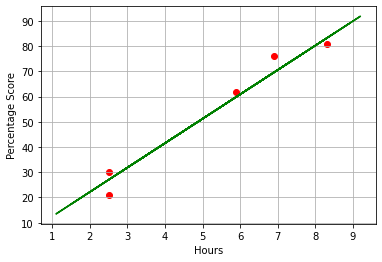

In [ ]:
# plotting for the test data
plt.scatter(X_test, y_test, color='red')
plt.plot(X,line,color='green')
plt.xlabel('Hours')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

> ### STEP 6 : Making predictions

In [ ]:
#Actual hours vs predicted marks
print(X_test)
y_pred = regressor.predict(X_test)

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [ ]:
prediction = pd.DataFrame({'Actual Hours':[i[0] for i in X_test], 'Predicted Score':[j for j in y_pred]})
prediction

,Actual Hours,Predicted Score
0,8.3,83.188141
1,2.5,27.032088
2,2.5,27.032088
3,6.9,69.633232
4,5.9,59.951153


In [ ]:
#COMPARING ACTUAL SCORE VS PREDICTED SCORE
compare = pd.DataFrame({'Actual Score':y_test, 'Predicted Score':y_pred})
compare

,Actual Score,Predicted Score
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


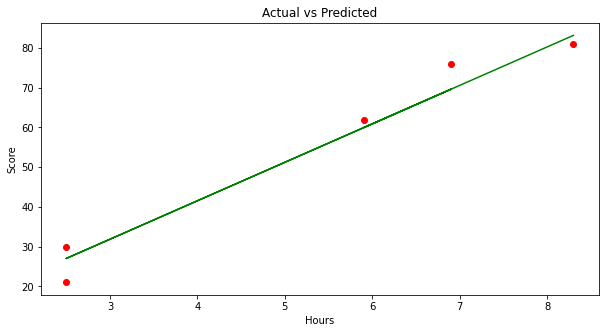

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred,color='green')
plt.title('Actual vs Predicted')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()


In [ ]:
# testing with own data
hours = 9.25
score = regressor.predict([[hours]])
print("The Predicted score {}".format(score[0]),"when a person studies for {} hours ".format(hours))

The Predicted score 92.38611528261494 when a person studies for 9.25 hours 


> ### STEP 7 : Evaluating the model 

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 1.9800886824104431


> # **Conclusion**

> ### Completing the model it is evaluated that if a student studies for 9.25hrs/day then he/she will score 92.38 marks.
